# Example 5

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# algemene gegevens
x = sym.symbols('x')
EI, EA = sym.symbols('EI EA')
CV, CM, Cphi, Cuz, CN, Cux = sym.symbols('C_V C_M C_phi C_uz C_N C_ux') 
dx = 2*10**-15

# gegevens constructie
a0, a1, a2, a3, a4, a5 = 0, 4, 8, 12, 16, 20
aa = [a0, a1, a2, a3, a4, a5]
o0, o1, o2, o3, o4 = np.pi/2, 0, 0, -np.pi/2, -np.pi/2
oo = [o0, o1, o2, o3, o4]

# sprongen in de x functie
uzEC, uxEC = sym.symbols('u_z^EC u_x^EC')
s1 = 16+2*dx
ss = [s1]

# gegevens belastingen
qv, qh = 20, 10
RvA, RhA, RvB, RhB, RvC, RhC = sym.symbols('R_v^A R_h^A R_v^B R_h^B R_v^C R_h^C')
phisEB = sym.symbols('phi_s^EB')
VEB, HEB = sym.symbols('V^EB H^EB')
B = [RvA, RhA, qh, -qh, qv, -qv, VEB, HEB, RvC, RhC, -VEB, -HEB, phisEB, uzEC, uxEC, RvB, RhB]
b1, b2, b3, b4, b5, b6, b7 = 0, 4, 8, 12, 16, 16+2*dx, 20
bb = [b1, b1, b1, b2, b2, b4, b3, b3, b5, b5, b6, b6, b6, b6, b6, b7, b7]
# K = 1, Fv = 2, Fh = 3, qv = 4, qh = 5, phi = 6, uz = 7, ux = 8
nn = [2, 3, 5, 5, 4, 4, 2, 3, 2, 3, 2, 3, 6, 7, 8, 2, 3]

In [3]:
#qz opstellen
qz = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 1:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[-1])
            if nn[i] == 4:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            if nn[i] == 5:
                qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 1:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-2)
                if nn[i] == 2:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 3:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.sin(oo[j-1])
                if nn[i] == 4:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 5:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.sin(oo[j-1])
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 6:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-3) * EI
                if nn[i] == 7:
                    qz += B[i] * sym.SingularityFunction(x,bb[i],-4) * EI
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 3:
                qz += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.sin(oo[j]) - sym.sin(oo[j-1]))
            if nn[i] == 4:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))
            if nn[i] == 5:
                qz += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.sin(oo[j]) - sym.sin(oo[j-1])))

display(qz)

2*EI*phi_s^EB*SingularityFunction(x, 16.0, -3) + EI*u_z^EC*SingularityFunction(x, 16.0, -4) - 1.0*H^EB*SingularityFunction(x, 12, -1) + 1.0*H^EB*SingularityFunction(x, 16.0, -1) + 1.0*R_h^A*SingularityFunction(x, 0, -1) - 1.0*R_h^A*SingularityFunction(x, 4, -1) - 1.0*R_h^A*SingularityFunction(x, 12, -1) - 1.0*R_h^B*SingularityFunction(x, 20, -1) - 1.0*R_h^C*SingularityFunction(x, 16, -1) + 6.12323399573677e-17*R_v^A*SingularityFunction(x, 0, -1) + 1.0*R_v^A*SingularityFunction(x, 4, -1) - 1.0*R_v^A*SingularityFunction(x, 12, -1) + 6.12323399573677e-17*R_v^B*SingularityFunction(x, 20, -1) + 6.12323399573677e-17*R_v^C*SingularityFunction(x, 16, -1) + V^EB*SingularityFunction(x, 8, -1) - 1.0*V^EB*SingularityFunction(x, 12, -1) - 6.12323399573677e-17*V^EB*SingularityFunction(x, 16.0, -1) + 10.0*SingularityFunction(x, 0, 0) - 40.0*SingularityFunction(x, 4, -1) + 10.0*SingularityFunction(x, 4, 0) - 200.0*SingularityFunction(x, 12, -1) - 20.0*SingularityFunction(x, 12, 0)

In [4]:
#qx opstellen
qx = 0

#beginpunten
for i in range(len(B)):
    for j in range(len(aa)):
        if bb[i] == aa[-1]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[-1])
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[-1])
            if nn[i] == 4:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[-1])
            if nn[i] == 5:
                qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[-1])
            break
        else:
            if bb[i] < aa[j]:
                if nn[i] == 2:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * -sym.sin(oo[j-1])
                if nn[i] == 3:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-1) * sym.cos(oo[j-1])
                if nn[i] == 4:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * -sym.sin(oo[j-1])
                if nn[i] == 5:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],0) * sym.cos(oo[j-1])
                if nn[i] == 8:
                    qx += B[i] * sym.SingularityFunction(x,bb[i],-2) * EA
                break

# knikpunten
for i in range(len(B)):
    for j in range(len(aa)-1):
        if bb[i] < aa[j]:
            if nn[i] == 2:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (-sym.sin(oo[j]) + sym.sin(oo[j-1]))
            if nn[i] == 3:
                qx += B[i] * sym.SingularityFunction(x,aa[j],-1) * (sym.cos(oo[j]) - sym.cos(oo[j-1]))
            if nn[i] == 4:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (-sym.sin(oo[j]) + sym.sin(oo[j-1])))
            if nn[i] == 5:
                qx += B[i] * ((sym.SingularityFunction(x,aa[j],0) + sym.SingularityFunction(x,aa[j],-1) * (aa[j] - bb[i])) * (sym.cos(oo[j]) - sym.cos(oo[j-1])))

display(qx)

EA*u_x^EC*SingularityFunction(x, 16.0, -2) + H^EB*SingularityFunction(x, 8, -1) - 1.0*H^EB*SingularityFunction(x, 12, -1) - 6.12323399573677e-17*H^EB*SingularityFunction(x, 16.0, -1) + 6.12323399573677e-17*R_h^A*SingularityFunction(x, 0, -1) + 1.0*R_h^A*SingularityFunction(x, 4, -1) - 1.0*R_h^A*SingularityFunction(x, 12, -1) + 6.12323399573677e-17*R_h^B*SingularityFunction(x, 20, -1) + 6.12323399573677e-17*R_h^C*SingularityFunction(x, 16, -1) - 1.0*R_v^A*SingularityFunction(x, 0, -1) + 1.0*R_v^A*SingularityFunction(x, 4, -1) + 1.0*R_v^A*SingularityFunction(x, 12, -1) + 1.0*R_v^B*SingularityFunction(x, 20, -1) + 1.0*R_v^C*SingularityFunction(x, 16, -1) + 1.0*V^EB*SingularityFunction(x, 12, -1) - 1.0*V^EB*SingularityFunction(x, 16.0, -1) + 6.12323399573677e-16*SingularityFunction(x, 0, 0) + 40.0*SingularityFunction(x, 4, -1) - 1.77635683940025e-15*SingularityFunction(x, 4, 0) + 120.0*SingularityFunction(x, 12, -1)

In [5]:
V = -sym.integrate(qz.expand(), x) + CV
M = sym.integrate(V, x) + CM
kappa = M / EI
phi = sym.integrate(kappa, x) + Cphi
uz = -sym.integrate(phi, x) + Cuz

N = -sym.integrate(qx.expand(), x) + CN
epsilon = N / EA
ux = sym.integrate(epsilon, x) + Cux

uvz = uz.subs(x,0) * sym.cos(o0)
uvx = -ux.subs(x,0) * sym.sin(o0)
for i in range(len(oo)):
    uvz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
    uvx += -((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
uv = uvz + uvx

uhz = uz.subs(x,0) * sym.sin(o0)
uhx = ux.subs(x,0) * sym.cos(o0)
for i in range(len(oo)):
    uhz += ((uz - uz.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (uz - uz.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.sin(oo[i])
    uhx += ((ux - ux.subs(x,aa[i])) * sym.SingularityFunction(x,aa[i],0) - (ux - ux.subs(x,aa[i+1])) * sym.SingularityFunction(x,aa[i+1],0)) * sym.cos(oo[i])
uh = uhz + uhx

display(sym.symbols('{N}='), N)
display(sym.symbols('{V}='), V)
display(sym.symbols('{M}='), M)
display(sym.symbols('{u_x}='), ux)
display(sym.symbols('{\phi}='), phi)
display(sym.symbols('{u_z}='), uz)
display(sym.symbols('{u_v}='), uv)
display(sym.symbols('{u_h}='), uh)

{N}=

C_N - EA*u_x^EC*SingularityFunction(x, 16.0, -1) - H^EB*SingularityFunction(x, 8, 0) + 1.0*H^EB*SingularityFunction(x, 12, 0) + 6.12323399573677e-17*H^EB*SingularityFunction(x, 16.0, 0) - 6.12323399573677e-17*R_h^A*SingularityFunction(x, 0, 0) - 1.0*R_h^A*SingularityFunction(x, 4, 0) + 1.0*R_h^A*SingularityFunction(x, 12, 0) - 6.12323399573677e-17*R_h^B*SingularityFunction(x, 20, 0) - 6.12323399573677e-17*R_h^C*SingularityFunction(x, 16, 0) + 1.0*R_v^A*SingularityFunction(x, 0, 0) - 1.0*R_v^A*SingularityFunction(x, 4, 0) - 1.0*R_v^A*SingularityFunction(x, 12, 0) - 1.0*R_v^B*SingularityFunction(x, 20, 0) - 1.0*R_v^C*SingularityFunction(x, 16, 0) - 1.0*V^EB*SingularityFunction(x, 12, 0) + 1.0*V^EB*SingularityFunction(x, 16.0, 0) - 6.12323399573677e-16*SingularityFunction(x, 0, 1) - 40.0*SingularityFunction(x, 4, 0) + 1.77635683940025e-15*SingularityFunction(x, 4, 1) - 120.0*SingularityFunction(x, 12, 0)

{V}=

C_V - 2*EI*phi_s^EB*SingularityFunction(x, 16.0, -2) - EI*u_z^EC*SingularityFunction(x, 16.0, -3) + 1.0*H^EB*SingularityFunction(x, 12, 0) - 1.0*H^EB*SingularityFunction(x, 16.0, 0) - 1.0*R_h^A*SingularityFunction(x, 0, 0) + 1.0*R_h^A*SingularityFunction(x, 4, 0) + 1.0*R_h^A*SingularityFunction(x, 12, 0) + 1.0*R_h^B*SingularityFunction(x, 20, 0) + 1.0*R_h^C*SingularityFunction(x, 16, 0) - 6.12323399573677e-17*R_v^A*SingularityFunction(x, 0, 0) - 1.0*R_v^A*SingularityFunction(x, 4, 0) + 1.0*R_v^A*SingularityFunction(x, 12, 0) - 6.12323399573677e-17*R_v^B*SingularityFunction(x, 20, 0) - 6.12323399573677e-17*R_v^C*SingularityFunction(x, 16, 0) - V^EB*SingularityFunction(x, 8, 0) + 1.0*V^EB*SingularityFunction(x, 12, 0) + 6.12323399573677e-17*V^EB*SingularityFunction(x, 16.0, 0) - 10.0*SingularityFunction(x, 0, 1) + 40.0*SingularityFunction(x, 4, 0) - 10.0*SingularityFunction(x, 4, 1) + 200.0*SingularityFunction(x, 12, 0) + 20.0*SingularityFunction(x, 12, 1)

{M}=

C_M + C_V*x - 2*EI*phi_s^EB*SingularityFunction(x, 16.0, -1) - EI*u_z^EC*SingularityFunction(x, 16.0, -2) + 1.0*H^EB*SingularityFunction(x, 12, 1) - 1.0*H^EB*SingularityFunction(x, 16.0, 1) - 1.0*R_h^A*SingularityFunction(x, 0, 1) + 1.0*R_h^A*SingularityFunction(x, 4, 1) + 1.0*R_h^A*SingularityFunction(x, 12, 1) + 1.0*R_h^B*SingularityFunction(x, 20, 1) + 1.0*R_h^C*SingularityFunction(x, 16, 1) - 6.12323399573677e-17*R_v^A*SingularityFunction(x, 0, 1) - 1.0*R_v^A*SingularityFunction(x, 4, 1) + 1.0*R_v^A*SingularityFunction(x, 12, 1) - 6.12323399573677e-17*R_v^B*SingularityFunction(x, 20, 1) - 6.12323399573677e-17*R_v^C*SingularityFunction(x, 16, 1) - V^EB*SingularityFunction(x, 8, 1) + 1.0*V^EB*SingularityFunction(x, 12, 1) + 6.12323399573677e-17*V^EB*SingularityFunction(x, 16.0, 1) - 5.0*SingularityFunction(x, 0, 2) + 40.0*SingularityFunction(x, 4, 1) - 5.0*SingularityFunction(x, 4, 2) + 200.0*SingularityFunction(x, 12, 1) + 10.0*SingularityFunction(x, 12, 2)

{u_x}=

C_ux + (C_N*x - EA*u_x^EC*SingularityFunction(x, 16.0, 0) - H^EB*SingularityFunction(x, 8, 1) + 1.0*H^EB*SingularityFunction(x, 12, 1) + 6.12323399573677e-17*H^EB*SingularityFunction(x, 16.0, 1) - 6.12323399573677e-17*R_h^A*SingularityFunction(x, 0, 1) - 1.0*R_h^A*SingularityFunction(x, 4, 1) + 1.0*R_h^A*SingularityFunction(x, 12, 1) - 6.12323399573677e-17*R_h^B*SingularityFunction(x, 20, 1) - 6.12323399573677e-17*R_h^C*SingularityFunction(x, 16, 1) + 1.0*R_v^A*SingularityFunction(x, 0, 1) - 1.0*R_v^A*SingularityFunction(x, 4, 1) - 1.0*R_v^A*SingularityFunction(x, 12, 1) - 1.0*R_v^B*SingularityFunction(x, 20, 1) - 1.0*R_v^C*SingularityFunction(x, 16, 1) - 1.0*V^EB*SingularityFunction(x, 12, 1) + 1.0*V^EB*SingularityFunction(x, 16.0, 1) - 3.06161699786838e-16*SingularityFunction(x, 0, 2) - 40.0*SingularityFunction(x, 4, 1) + 8.88178419700125e-16*SingularityFunction(x, 4, 2) - 120.0*SingularityFunction(x, 12, 1))/EA

{\phi}=

C_phi + (C_M*x + C_V*x**2/2 - 2*EI*phi_s^EB*SingularityFunction(x, 16.0, 0) - EI*u_z^EC*SingularityFunction(x, 16.0, -1) + 0.5*H^EB*SingularityFunction(x, 12, 2) - 0.5*H^EB*SingularityFunction(x, 16.0, 2) - 0.5*R_h^A*SingularityFunction(x, 0, 2) + 0.5*R_h^A*SingularityFunction(x, 4, 2) + 0.5*R_h^A*SingularityFunction(x, 12, 2) + 0.5*R_h^B*SingularityFunction(x, 20, 2) + 0.5*R_h^C*SingularityFunction(x, 16, 2) - 3.06161699786838e-17*R_v^A*SingularityFunction(x, 0, 2) - 0.5*R_v^A*SingularityFunction(x, 4, 2) + 0.5*R_v^A*SingularityFunction(x, 12, 2) - 3.06161699786838e-17*R_v^B*SingularityFunction(x, 20, 2) - 3.06161699786838e-17*R_v^C*SingularityFunction(x, 16, 2) - V^EB*SingularityFunction(x, 8, 2)/2 + 0.5*V^EB*SingularityFunction(x, 12, 2) + 3.06161699786838e-17*V^EB*SingularityFunction(x, 16.0, 2) - 1.66666666666667*SingularityFunction(x, 0, 3) + 20.0*SingularityFunction(x, 4, 2) - 1.66666666666667*SingularityFunction(x, 4, 3) + 100.0*SingularityFunction(x, 12, 2) + 3.33333333333333*

{u_z}=

-C_phi*x + C_uz - (C_M*x**2/2 + C_V*x**3/6 - 2*EI*phi_s^EB*SingularityFunction(x, 16.0, 1) - EI*u_z^EC*SingularityFunction(x, 16.0, 0) + 0.166666666666667*H^EB*SingularityFunction(x, 12, 3) - 0.166666666666667*H^EB*SingularityFunction(x, 16.0, 3) - 0.166666666666667*R_h^A*SingularityFunction(x, 0, 3) + 0.166666666666667*R_h^A*SingularityFunction(x, 4, 3) + 0.166666666666667*R_h^A*SingularityFunction(x, 12, 3) + 0.166666666666667*R_h^B*SingularityFunction(x, 20, 3) + 0.166666666666667*R_h^C*SingularityFunction(x, 16, 3) - 1.02053899928946e-17*R_v^A*SingularityFunction(x, 0, 3) - 0.166666666666667*R_v^A*SingularityFunction(x, 4, 3) + 0.166666666666667*R_v^A*SingularityFunction(x, 12, 3) - 1.02053899928946e-17*R_v^B*SingularityFunction(x, 20, 3) - 1.02053899928946e-17*R_v^C*SingularityFunction(x, 16, 3) - V^EB*SingularityFunction(x, 8, 3)/6 + 0.166666666666667*V^EB*SingularityFunction(x, 12, 3) + 1.02053899928946e-17*V^EB*SingularityFunction(x, 16.0, 3) - 0.416666666666667*SingularityFunc

{u_v}=

-1.0*C_ux + 6.12323399573677e-17*C_uz + 6.12323399573677e-17*(-C_phi*x - (C_M*x**2/2 + C_V*x**3/6 - 2*EI*phi_s^EB*SingularityFunction(x, 16.0, 1) - EI*u_z^EC*SingularityFunction(x, 16.0, 0) + 0.166666666666667*H^EB*SingularityFunction(x, 12, 3) - 0.166666666666667*H^EB*SingularityFunction(x, 16.0, 3) - 0.166666666666667*R_h^A*SingularityFunction(x, 0, 3) + 0.166666666666667*R_h^A*SingularityFunction(x, 4, 3) + 0.166666666666667*R_h^A*SingularityFunction(x, 12, 3) + 0.166666666666667*R_h^B*SingularityFunction(x, 20, 3) + 0.166666666666667*R_h^C*SingularityFunction(x, 16, 3) - 1.02053899928946e-17*R_v^A*SingularityFunction(x, 0, 3) - 0.166666666666667*R_v^A*SingularityFunction(x, 4, 3) + 0.166666666666667*R_v^A*SingularityFunction(x, 12, 3) - 1.02053899928946e-17*R_v^B*SingularityFunction(x, 20, 3) - 1.02053899928946e-17*R_v^C*SingularityFunction(x, 16, 3) - V^EB*SingularityFunction(x, 8, 3)/6 + 0.166666666666667*V^EB*SingularityFunction(x, 12, 3) + 1.02053899928946e-17*V^EB*SingularityF

{u_h}=

6.12323399573677e-17*C_ux + 1.0*C_uz + 1.0*(-C_phi*x - (C_M*x**2/2 + C_V*x**3/6 - 2*EI*phi_s^EB*SingularityFunction(x, 16.0, 1) - EI*u_z^EC*SingularityFunction(x, 16.0, 0) + 0.166666666666667*H^EB*SingularityFunction(x, 12, 3) - 0.166666666666667*H^EB*SingularityFunction(x, 16.0, 3) - 0.166666666666667*R_h^A*SingularityFunction(x, 0, 3) + 0.166666666666667*R_h^A*SingularityFunction(x, 4, 3) + 0.166666666666667*R_h^A*SingularityFunction(x, 12, 3) + 0.166666666666667*R_h^B*SingularityFunction(x, 20, 3) + 0.166666666666667*R_h^C*SingularityFunction(x, 16, 3) - 1.02053899928946e-17*R_v^A*SingularityFunction(x, 0, 3) - 0.166666666666667*R_v^A*SingularityFunction(x, 4, 3) + 0.166666666666667*R_v^A*SingularityFunction(x, 12, 3) - 1.02053899928946e-17*R_v^B*SingularityFunction(x, 20, 3) - 1.02053899928946e-17*R_v^C*SingularityFunction(x, 16, 3) - V^EB*SingularityFunction(x, 8, 3)/6 + 0.166666666666667*V^EB*SingularityFunction(x, 12, 3) + 1.02053899928946e-17*V^EB*SingularityFunction(x, 16.0, 3

In [6]:
# 6 reactiekrachten + 2 knoopkrachten + 2 vervormingssprongen + 1 scharnier + 6 integratieconstanten = 17 voorwaarden
Eq1 = sym.Eq(N.subs(x,0-dx),0)
Eq2 = sym.Eq(N.subs(x,a4),0)
Eq3 = sym.Eq(N.subs(x,a5),0)
Eq4 = sym.Eq(V.subs(x,0-dx),0)
Eq5 = sym.Eq(V.subs(x,a4),0)
Eq6 = sym.Eq(V.subs(x,a5),0)
Eq7 = sym.Eq(M.subs(x,0),0)
Eq8 = sym.Eq(M.subs(x,a4),0)
Eq9 = sym.Eq(M.subs(x,a5),0)
Eq10 = sym.Eq(uv.subs(x,0),0)
Eq11 = sym.Eq(uv.subs(x,a4),0)
Eq12 = sym.Eq(uv.subs(x,a5),0)
Eq13 = sym.Eq(uh.subs(x,0),0)
Eq14 = sym.Eq(uh.subs(x,a4),0)
Eq15 = sym.Eq(uh.subs(x,a5),0)
Eq16 = sym.Eq(uv.subs(x,s1)-uv.subs(x,a2),0)
Eq17 = sym.Eq(uh.subs(x,s1)-uh.subs(x,a2),0)

In [7]:
sol = sym.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8,Eq9,Eq10,Eq11,Eq12,Eq13,Eq14,Eq15,Eq16,Eq17),(RvA,RhA,RvB,RhB,RvC,RhC,VEB,HEB,phisEB,uzEC,uxEC,CN,CV,CM,Cphi,Cuz,Cux))
display(sol)

{C_M: 0.0,
 C_N: 0.0,
 C_V: 0.0,
 C_phi: (-4.35200000000004e+259*EA**3 - 6.24000000000002e+259*EA**2*EI - 1.4112e+259*EA*EI**2 - 1.62e+257*EI**3)/(2.688e+257*EA**3*EI + 3.744e+257*EA**2*EI**2 + 1.62e+256*EA*EI**3),
 C_ux: 0.0,
 C_uz: 0.0,
 H^EB: (-2.82440737464642e+213*EA**2 - 3.45057316053499e+213*EA*EI - 1.44884104713583e+212*EI**2)/(2.24e+227*EA**2 + 3.12e+227*EA*EI + 1.35e+226*EI**2),
 R_h^A: (-5.76000000000005e+228*EA**2 - 6.54e+228*EA*EI - 5.4e+227*EI**2)/(2.24e+227*EA**2 + 3.12e+227*EA*EI + 1.35e+226*EI**2),
 R_h^B: (-1.85250730654591e+275*EA**2 - 2.53045465343985e+275*EA*EI - 1.09035331709877e+274*EI**2)/(2.24e+289*EA**2 + 3.12e+289*EA*EI + 1.35e+288*EI**2),
 R_h^C: (-3.19999999999995e+228*EA**2 - 5.94e+228*EA*EI - 3.65932793530848e+211*EI**2)/(2.24e+227*EA**2 + 3.12e+227*EA*EI + 1.35e+226*EI**2),
 R_v^A: (-5.91999999999986e+228*EA**2 - 1.26e+229*EA*EI - 5.85e+227*EI**2)/(2.24e+227*EA**2 + 3.12e+227*EA*EI + 1.35e+226*EI**2),
 R_v^B: (-1.95200000000003e+291*EA**2 - 1.848e+291*EA

In [8]:
#display(sym.simplify(uz.subs(sol).rewrite(sym.Piecewise)))
ea = 10**3
ei = 10**3

display(f'{RvA} = {RvA.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RhA} = {RhA.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RvB} = {RvB.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RhB} = {RhB.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RvC} = {RvC.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{RhC} = {RhC.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{VEB} = {VEB.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{HEB} = {HEB.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')

display(f'{phisEB} = {phisEB.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

display(f'{uzEC} = {uzEC.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{uxEC} = {uxEC.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

display(f'{CN} = {CN.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CV} = {CV.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{CM} = {CM.subs(sol).subs(EI,ei).subs(EA,ea):.2f}')
display(f'{Cphi} = {Cphi.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cux} = {Cux.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')
display(f'{Cuz} = {Cuz.subs(sol).subs(EI,ei).subs(EA,ea):.4f}')

'R_v^A = -34.77'

'R_h^A = -23.37'

'R_v^B = -70.46'

'R_h^B = -0.00'

'R_v^C = -54.77'

'R_h^C = -16.63'

'V^EB = -70.46'

'H^EB = -0.00'

'phi_s^EB = -0.0139'

'u_z^EC = -0.5200'

'u_x^EC = -0.2819'

'C_N = 0.00'

'C_V = 0.00'

'C_M = 0.00'

'C_phi = -0.1823'

'C_ux = 0.0000'

'C_uz = 0.0000'

In [9]:
vEC, hEC = sym.symbols('v^EC h^EC')
vv = [vEC]
hh = [hEC]
v = 0
h = 0
for i in range(len(oo)):
    v += -(sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.sin(oo[i])
    h += (sym.SingularityFunction(x,aa[i],1) - sym.SingularityFunction(x,aa[i+1],1)) * sym.cos(oo[i])
for i in range(len(ss)):
    v += vv[i] * sym.SingularityFunction(x,ss[i],0)
    h += hh[i] * sym.SingularityFunction(x,ss[i],0)

# 2 x 2 sprongen = 4 onbekenden
Eq1 = sym.Eq(v.subs(x,a2),v.subs(x,s1))
Eq2 = sym.Eq(h.subs(x,a2),h.subs(x,s1))

sol2 = sym.solve((Eq1,Eq2),(vEC, hEC))
display(sol2)

{h^EC: -4.00000000000000, v^EC: -4.00000000000000}

In [10]:
L = aa[-1]
x_np = np.linspace(0-dx,L+dx,10000)
ab = aa
ab.extend(bb)
ab.sort()
ab = list(dict.fromkeys(ab))

-34.7679708826203*SingularityFunction(x, 0, 0) - 6.12323399573677e-16*SingularityFunction(x, 0, 1) + 18.1346678798907*SingularityFunction(x, 4, 0) + 1.77635683940025e-15*SingularityFunction(x, 4, 1) + 1.1683102165414e-14*SingularityFunction(x, 8, 0) - 38.1346678798906*SingularityFunction(x, 12, 0) + 54.7679708826203*SingularityFunction(x, 16, 0) + 281.856232939038*SingularityFunction(x, 16.0, -1) - 70.4640582347594*SingularityFunction(x, 16.0, 0) + 70.4640582347594*SingularityFunction(x, 20, 0)

'N(0) = -34.7679708826203 [kN]'

'N(4) = -16.6333030027296 [kN]'

'N(8) = -16.6333030027296 [kN]'

'N(12) = -54.7679708826203 [kN]'

'N(16) = 2.94402054944811E-14 [kN]'

'N(16.000000000000004) = oo [kN]'

'N(20) = 2.94402054944811E-14 [kN]'

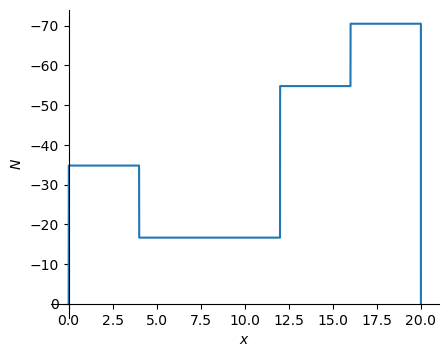

In [11]:
N_np = sym.lambdify(x, N.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(N.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'N({ab[i]}) = {N.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)} [kN]')

plt.figure(figsize=(5,4))
plt.plot(x_np,N_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$N$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

23.3666969972704*SingularityFunction(x, 0, 0) - 10.0*SingularityFunction(x, 0, 1) + 51.40127388535*SingularityFunction(x, 4, 0) - 10.0*SingularityFunction(x, 4, 1) + 70.4640582347594*SingularityFunction(x, 8, 0) + 71.40127388535*SingularityFunction(x, 12, 0) + 20.0*SingularityFunction(x, 12, 1) - 16.6333030027297*SingularityFunction(x, 16, 0) + 520.000000000003*SingularityFunction(x, 16.0, -3) + 27.7221716712255*SingularityFunction(x, 16.0, -2) + 7.36842299680748e-15*SingularityFunction(x, 16.0, 0) - 3.86002017933822e-15*SingularityFunction(x, 20, 0)

'V(0) = 23.3666969972703 [kN]'

'V(4) = 34.7679708826203 [kN]'

'V(8) = 25.2320291173797 [kN]'

'V(12) = 16.6333030027296 [kN]'

'V(16) = oo [kN]'

'V(16.000000000000004) = -1.05499772028045E-14 [kN]'

'V(20) = -5.59732895374049E-14 [kN]'

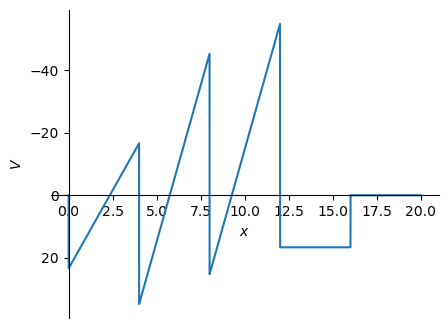

In [12]:
V_np = sym.lambdify(x, V.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
display(V.subs(sol).subs(EI,ei).subs(EA,ea))

for i in range(len(ab)):
    display(f'V({ab[i]}) = {V.subs(x,ab[i]+dx).subs(sol).subs(EI,ei).subs(EA,ea)} [kN]')

plt.figure(figsize=(5,4))
plt.plot(x_np,V_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'M(0) = 0.0 [kNm]'

'M(4) = 13.4667879890814 [kNm]'

'M(8) = -7.46132848043729 [kNm]'

'M(12) = -66.5332120109185 [kNm]'

'M(16) = 5.68434188608080E-14 [kNm]'

'M(16.000000000000004) = oo [kNm]'

'M(20) = 1.27101121769055E-13 [kNm]'

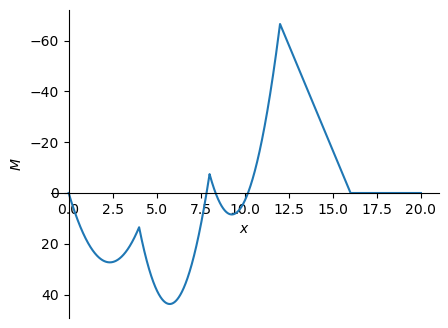

In [13]:
M_np = sym.lambdify(x, M.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

for i in range(len(ab)):
    display(f'M({ab[i]}) = {M.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea)} [kNm]')

plt.figure(figsize=(5,4))
plt.plot(x_np,M_np(x_np))
plt.xlabel('$x$')
plt.ylabel('$M$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

'uv(0.0) = 0.0000 [m]'

'uv(4.0) = 0.1391 [m]'

'uv(8.0) = 0.2819 [m]'

'uv(12.0) = 0.2191 [m]'

'uv(16.0) = 0.0000 [m]'

'uv(16.0) = 0.2819 [m]'

'uv(20.0) = 0.0000 [m]'

'uh(0.0) = 0.0000 [m]'

'uh(4.0) = 0.5865 [m]'

'uh(8.0) = 0.5200 [m]'

'uh(12.0) = 0.4535 [m]'

'uh(16.0) = 0.0000 [m]'

'uh(16.0) = 0.5200 [m]'

'uh(20.0) = 0.0000 [m]'

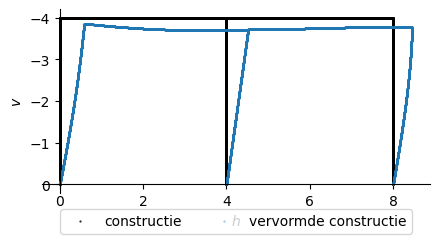

In [14]:
v_np = sym.lambdify(x, v.subs(sol2).rewrite(sym.Piecewise))
h_np = sym.lambdify(x, h.subs(sol2).rewrite(sym.Piecewise))

uv_np = sym.lambdify(x, uv.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))
uh_np = sym.lambdify(x, uh.subs(sol).subs(EI,ei).subs(EA,ea).rewrite(sym.Piecewise))

#display(uv.subs(sol))
for i in range(len(ab)):
    display(f'uv({ab[i]:.1f}) = {uv.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea):.4f} [m]')

for i in range(len(ab)):
    display(f'uh({ab[i]:.1f}) = {uh.subs(x,ab[i]).subs(sol).subs(EI,ei).subs(EA,ea):.4f} [m]')

plt.figure(figsize=(5,4))
plt.plot(h_np(x_np),v_np(x_np), marker='.',markersize=1, linewidth=0, color='black', label='constructie')
plt.plot((h_np(x_np)+uh_np(x_np)),(v_np(x_np)+uv_np(x_np)), marker='.',markersize=0.5, linewidth=0, label='vervormde constructie')
plt.xlabel('$h$')
plt.ylabel('$v$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()
plt.axis('scaled')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=False, ncol=3);